# 用 Matplotlib 绘图
用 Matplotlib 创建柱状图，显示用 groupby 和查询功能做出的结论。

In [4]:
# 导入所需数据包并加载 `winequality_edited.csv`
import pandas as pd
import matplotlib.pyplot as plt
# % matplotlib inline

df = pd.read_csv('winequality_edited.csv')

### #1: 酒精含量高的酒是否评分较高？
创建柱状图，用一个条柱表示酒精含量低的酒样本，另一个条柱表示酒精含量高的酒样本。第一个条柱已填充了数据。

In [5]:
# 用查询功能选择每个组，并获取其平均质量
median = df['alcohol'].median()
low = df.query('alcohol < {}'.format(median))
high = df.query('alcohol >= {}'.format(median))

mean_quality_low = low['quality'].mean()
mean_quality_high = high['quality'].mean()

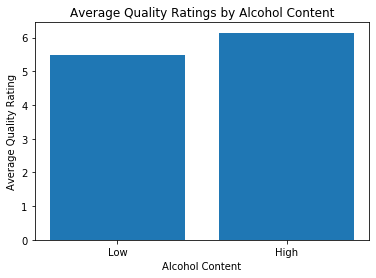

In [6]:
# 用合适的标签创建柱状图
locations = [1, 2]
heights = [mean_quality_low, mean_quality_high]
labels = ['Low', 'High']
plt.bar(locations, heights, tick_label=labels)
plt.title('Average Quality Ratings by Alcohol Content')
plt.xlabel('Alcohol Content')
plt.ylabel('Average Quality Rating');

### #2: 口感较甜的酒是否评分较高？
创建柱状图，用一个条柱表示残留糖分低的酒样本，另一个条柱表示残留糖分高的酒样本。

In [6]:
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color,acidity_levels
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,EL
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red,H
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red,L
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red,H
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,EL


In [11]:
# 用查询功能选择每个组，并获取其平均质量
sugar_m = df['residual_sugar'].mean()
low = df.query('residual_sugar < {}'.format(sugar_m))
high = df.query('residual_sugar >= {}'.format(sugar_m))
mean_quality_low = low['quality'].mean()
mean_quality_high = high['quality'].mean()

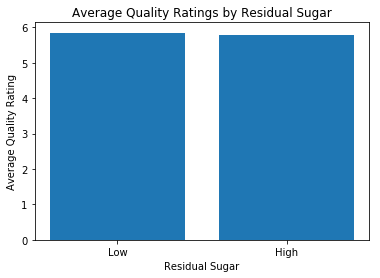

In [17]:
# 用合适的标签创建柱状图
locations = [1,2]
heights = [mean_quality_low,mean_quality_high]
labels = ['Low','High']
plt.bar(locations, heights, tick_label=labels)
plt.title('Average Quality Ratings by Residual Sugar')
plt.xlabel('Residual Sugar')
plt.ylabel('Average Quality Rating');

### #3: 哪个酸度水平的平均评分最高？
创建柱状图，四个酸度水平分别用一个条柱表示。

In [7]:
# 使用分组功能获取每个酸度水平的平均质量
mean_quality_el = df[df['acidity_levels'] == 'EL']['quality'].mean()
mean_quality_l = df[df['acidity_levels'] == 'L']['quality'].mean()
mean_quality_h = df[df['acidity_levels'] == 'H']['quality'].mean()
mean_quality_eh = df[df['acidity_levels'] == 'EH']['quality'].mean()

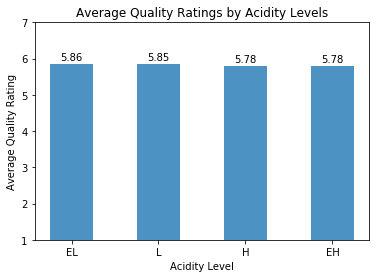

In [8]:
# 用合适的标签创建柱状图
locations = [1,2,3,4]
heights = [mean_quality_el,mean_quality_l,mean_quality_h,mean_quality_eh]
labels = ['EL','L','H','EH']
plt.bar(locations, heights, width=0.5, tick_label=labels, alpha=0.8)
plt.title('Average Quality Ratings by Acidity Levels')
plt.xlabel('Acidity Level')
plt.ylabel('Average Quality Rating')
plt.ylim(1,7)
for a,b in zip(locations, heights):
    plt.text(a, b+0.05, '%.2f' % b, ha='center', va= 'bottom', fontsize=10)
#     plt.text(a, b+0.05, round(b,2), ha='center', va= 'bottom', fontsize=10)

### 附加题：为 #3 中的数据创建线图
可以使用 pyplot 的 [绘图](https://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.plot) 功能进行创建。

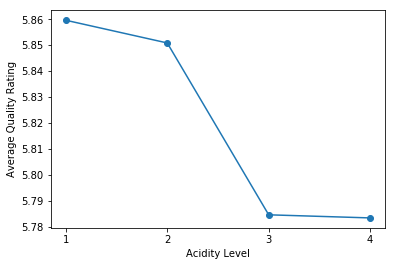

In [53]:
locations = [1,2,3,4]
heights = [mean_quality_el,mean_quality_l,mean_quality_h,mean_quality_eh]
labels = ['EL','L','H','EH']
plt.plot(locations, heights, 'o-')
plt.xticks(locations)
plt.xlabel('Acidity Level')
plt.ylabel('Average Quality Rating');

将线图与柱状图相比较。如果用线图代替柱状图，会对数据结论产生什么影响？